# Create cQTL marker maps

__Author:__ Bryan Quach  
__Date:__ May 22, 2017

### Estimated Analysis Time: <1 days

## Objective

To get a better sense of the spatial distribution of cQTLs in relation to their quantitatve trait regions (QTRs), we create a map of color-encoded q-values on a scatterplot of cQTL genomic location vs. QTR genomic location.

## The Data

The data we start with are p-values in a matrix of chromatin region x marker-associated segments. We also have genomic coordinate information for each marker. To simplify the annotation to location mapping for both chromatin regions and marker segments, we will use the starting position of both as the representative genomic coordinate. We have results from both trans- and cis-cQTL analyses. We applied [FDR correction](https://en.wikipedia.org/wiki/False_discovery_rate) to the p-values from all association tests. The resulting q-values were filtered to only those with FDR <= 0.1. This filtered set of associations are used for downstream visualization of cQTL locations.

## Creating cis + trans-cQTL location maps

In [9]:
# Get FDR corrected cQTLs for each tissue
lung.cqtl <- readRDS("data/fdr_0.1_lung.rds")
liver.cqtl <- readRDS("data/fdr_0.1_liver.rds")
kidney.cqtl <- readRDS("data/fdr_0.1_kidney.rds")
colnames(lung.cqtl)[1] <- "region"
colnames(liver.cqtl)[1] <- "region"
colnames(kidney.cqtl)[1] <- "region"

# Get chromatin region coordinates
lung.map <- as.data.frame(do.call("rbind",sapply(as.character(lung.cqtl$region), function(x){strsplit(x=x, split='.', fixed=T)})), stringsAsFactors=F)[,1:2]
liver.map <- as.data.frame(do.call("rbind",sapply(as.character(liver.cqtl$region), function(x){strsplit(x=x, split='.', fixed=T)})), stringsAsFactors=F)[,1:2]
kidney.map <- as.data.frame(do.call("rbind",sapply(as.character(kidney.cqtl$region), function(x){strsplit(x=x, split='.', fixed=T)})), stringsAsFactors=F)[,1:2]
colnames(lung.map) <- c("chr", "start")
colnames(liver.map) <- c("chr", "start")
colnames(kidney.map) <- c("chr", "start")
lung.map$chr <- as.character(lung.map$chr)
liver.map$chr <- as.character(liver.map$chr)
kidney.map$chr <- as.character(kidney.map$chr)
lung.map$start <- as.numeric(lung.map$start)
liver.map$start <- as.numeric(liver.map$start)
kidney.map$start <- as.numeric(kidney.map$start)

# Load other data
marker.map <- read.delim("data/marker_locations.txt", header=T, stringsAsFactors=F)
rownames(marker.map) <- marker.map$marker
chr.sizes <- read.delim("data/mm9_chrom_sizes.txt", header=F, stringsAsFactors=F)
colnames(chr.sizes) <- c("chr","length")

# Convert chromosome lengths and genomic locations to Mb
chr.sizes$length <- chr.sizes$length/1000000
marker.map$position <- marker.map$position/1000000
lung.map$start <- lung.map$start/1000000
liver.map$start <- liver.map$start/1000000
kidney.map$start <- kidney.map$start/1000000

In [10]:
# Make cQTL lists
lung.cqtl10 <- lung.cqtl[which(lung.cqtl$qval<0.1 & lung.cqtl$qval>0.05),]
lung.cqtl5 <- lung.cqtl[which(lung.cqtl$qval<=0.05 & lung.cqtl$qval>0.01),]
lung.cqtl1 <- lung.cqtl[which(lung.cqtl$qval<=0.01),]
liver.cqtl10 <- liver.cqtl[which(liver.cqtl$qval<0.1 & liver.cqtl$qval>0.05),]
liver.cqtl5 <- liver.cqtl[which(liver.cqtl$qval<=0.05 & liver.cqtl$qval>0.01),]
liver.cqtl1 <- liver.cqtl[which(liver.cqtl$qval<=0.01),]
kidney.cqtl10 <- kidney.cqtl[which(kidney.cqtl$qval<0.1 & kidney.cqtl$qval>0.05),]
kidney.cqtl5 <- kidney.cqtl[which(kidney.cqtl$qval<=0.05 & kidney.cqtl$qval>0.01),]
kidney.cqtl1 <- kidney.cqtl[which(kidney.cqtl$qval<=0.01),]

# Get reference marker name
lung.marker10 <- as.character(sapply(strsplit(as.character(lung.cqtl10$marker), split=".", fixed=T), function(x){x[1]}))
lung.marker5 <- as.character(sapply(strsplit(as.character(lung.cqtl5$marker), split=".", fixed=T), function(x){x[1]}))
lung.marker1 <- as.character(sapply(strsplit(as.character(lung.cqtl1$marker), split=".", fixed=T), function(x){x[1]}))
liver.marker10 <- as.character(sapply(strsplit(as.character(liver.cqtl10$marker), split=".", fixed=T), function(x){x[1]}))
liver.marker5 <- as.character(sapply(strsplit(as.character(liver.cqtl5$marker), split=".", fixed=T), function(x){x[1]}))
liver.marker1 <- as.character(sapply(strsplit(as.character(liver.cqtl1$marker), split=".", fixed=T), function(x){x[1]}))
kidney.marker10 <- as.character(sapply(strsplit(as.character(kidney.cqtl10$marker), split=".", fixed=T), function(x){x[1]}))
kidney.marker5 <- as.character(sapply(strsplit(as.character(kidney.cqtl5$marker), split=".", fixed=T), function(x){x[1]}))
kidney.marker1 <- as.character(sapply(strsplit(as.character(kidney.cqtl1$marker), split=".", fixed=T), function(x){x[1]}))

# Retrieve cQTL positions
lung.x10 <- c(as.numeric(marker.map[lung.marker10, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[lung.marker10, "chromosome"], chr.sizes$chr)])
lung.x5 <- c(as.numeric(marker.map[lung.marker5, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[lung.marker5, "chromosome"], chr.sizes$chr)])
lung.x1 <- c(as.numeric(marker.map[lung.marker1, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[lung.marker1, "chromosome"], chr.sizes$chr)])
liver.x10 <- c(as.numeric(marker.map[liver.marker10, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[liver.marker10, "chromosome"], chr.sizes$chr)])
liver.x5 <- c(as.numeric(marker.map[liver.marker5, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[liver.marker5, "chromosome"], chr.sizes$chr)])
liver.x1 <- c(as.numeric(marker.map[liver.marker1, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[liver.marker1, "chromosome"], chr.sizes$chr)])
kidney.x10 <- c(as.numeric(marker.map[kidney.marker10, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[kidney.marker10, "chromosome"], chr.sizes$chr)])
kidney.x5 <- c(as.numeric(marker.map[kidney.marker5, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[kidney.marker5, "chromosome"], chr.sizes$chr)])
kidney.x1 <- c(as.numeric(marker.map[kidney.marker1, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[kidney.marker1, "chromosome"], chr.sizes$chr)])

# Retrieve chromatin region positions
lung.y10 <- c(as.numeric(lung.map[as.character(lung.cqtl10$region), "start"]) +
                   diffinv(chr.sizes$length)[match(lung.map[as.character(lung.cqtl10$region), "chr"], chr.sizes$chr)])
lung.y5 <- c(as.numeric(lung.map[as.character(lung.cqtl5$region), "start"]) +
                   diffinv(chr.sizes$length)[match(lung.map[as.character(lung.cqtl5$region), "chr"], chr.sizes$chr)])
lung.y1 <- c(as.numeric(lung.map[as.character(lung.cqtl1$region), "start"]) +
                   diffinv(chr.sizes$length)[match(lung.map[as.character(lung.cqtl1$region), "chr"], chr.sizes$chr)])
liver.y10 <- c(as.numeric(liver.map[as.character(liver.cqtl10$region), "start"]) +
                   diffinv(chr.sizes$length)[match(liver.map[as.character(liver.cqtl10$region), "chr"], chr.sizes$chr)])
liver.y5 <- c(as.numeric(liver.map[as.character(liver.cqtl5$region), "start"]) +
                   diffinv(chr.sizes$length)[match(liver.map[as.character(liver.cqtl5$region), "chr"], chr.sizes$chr)])
liver.y1 <- c(as.numeric(liver.map[as.character(liver.cqtl1$region), "start"]) +
                   diffinv(chr.sizes$length)[match(liver.map[as.character(liver.cqtl1$region), "chr"], chr.sizes$chr)])
kidney.y10 <- c(as.numeric(kidney.map[as.character(kidney.cqtl10$region), "start"]) +
                   diffinv(chr.sizes$length)[match(kidney.map[as.character(kidney.cqtl10$region), "chr"], chr.sizes$chr)])
kidney.y5 <- c(as.numeric(kidney.map[as.character(kidney.cqtl5$region), "start"]) +
                   diffinv(chr.sizes$length)[match(kidney.map[as.character(kidney.cqtl5$region), "chr"], chr.sizes$chr)])
kidney.y1 <- c(as.numeric(kidney.map[as.character(kidney.cqtl1$region), "start"]) +
                   diffinv(chr.sizes$length)[match(kidney.map[as.character(kidney.cqtl1$region), "chr"], chr.sizes$chr)])

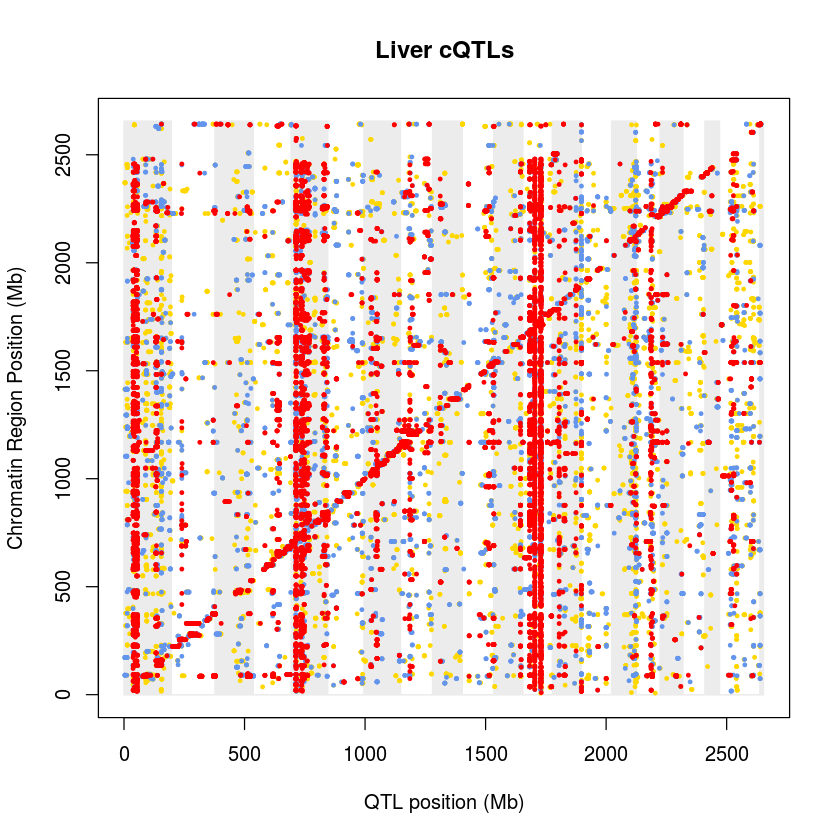

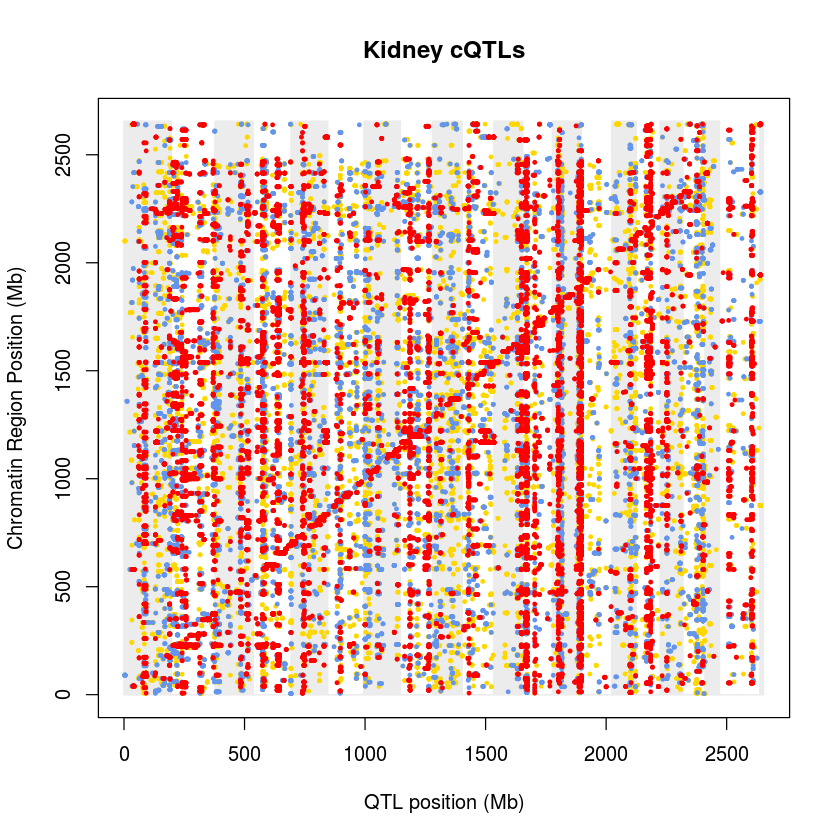

In [11]:
## Lung
# Plot alternate shading to distinguish adjacent chromosomes
chrStrips <- seq(0,0,length=sum(chr.sizes$length))
for(i in 2*0:as.integer((nrow(chr.sizes)-1)/2)+1){
    for (j in (diffinv(chr.sizes$length)[i]:diffinv(chr.sizes$length)[i+1])){
        chrStrips[j] <- 1;
    }
}
plot(chrStrips, type='h', col="#ECECEC", xlab='', ylab='', axes=F, ylim=c(0,1))
par(new=TRUE)

# Plot cqtls
plot(x=lung.x10, y=lung.y10, xlim=c(0,sum(chr.sizes$length)), ylim=c(0,sum(chr.sizes$length)), 
     pch=19, col="gold", xlab="QTL position (Mb)", ylab="Chromatin Region Position (Mb)", cex=0.4, main="Lung cQTLs")
points(x=lung.x5, y=lung.y5, pch=19, col="cornflowerblue", cex=0.4)
points(x=lung.x1, y=lung.y1, pch=19, col="red", cex=0.4)

## Liver
# Plot alternate shading to distinguish adjacent chromosomes
chrStrips <- seq(0,0,length=sum(chr.sizes$length))
for(i in 2*0:as.integer((nrow(chr.sizes)-1)/2)+1){
    for (j in (diffinv(chr.sizes$length)[i]:diffinv(chr.sizes$length)[i+1])){
        chrStrips[j] <- 1;
    }
}
plot(chrStrips, type='h', col="#ECECEC", xlab='', ylab='', axes=F, ylim=c(0,1))
par(new=TRUE)

# Plot cqtls
plot(x=liver.x10, y=liver.y10, xlim=c(0,sum(chr.sizes$length)), ylim=c(0,sum(chr.sizes$length)), 
     pch=19, col="gold", xlab="QTL position (Mb)", ylab="Chromatin Region Position (Mb)", cex=0.4, main="Liver cQTLs")
points(x=liver.x5, y=liver.y5, pch=19, col="cornflowerblue", cex=0.4)
points(x=liver.x1, y=liver.y1, pch=19, col="red", cex=0.4)


## Kidney
# Plot alternate shading to distinguish adjacent chromosomes
chrStrips <- seq(0,0,length=sum(chr.sizes$length))
for(i in 2*0:as.integer((nrow(chr.sizes)-1)/2)+1){
    for (j in (diffinv(chr.sizes$length)[i]:diffinv(chr.sizes$length)[i+1])){
        chrStrips[j] <- 1;
    }
}
plot(chrStrips, type='h', col="#ECECEC", xlab='', ylab='', axes=F, ylim=c(0,1))
par(new=TRUE)

# Plot cqtls
plot(x=kidney.x10, y=kidney.y10, xlim=c(0,sum(chr.sizes$length)), ylim=c(0,sum(chr.sizes$length)), 
     pch=19, col="gold", xlab="QTL position (Mb)", ylab="Chromatin Region Position (Mb)", cex=0.4, main="Kidney cQTLs")
points(x=kidney.x5, y=kidney.y5, pch=19, col="cornflowerblue", cex=0.4)
points(x=kidney.x1, y=kidney.y1, pch=19, col="red", cex=0.4)
